# Project 2

* Data Import and cleaning
    * Importing libraries
    * Importing dataset
    * Data cleaning
        * Handling missing values
        * Handling outliers
        * 

## Data import and cleaning

### 1. Importing libraries

In [1]:
#Data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#Modelling
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#Data splitting and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

#Loading data
import os

%matplotlib inline

### 2. Importing dataset

In [2]:
# Import Ames housing data
datapath = "../data"

ames_housing_path = os.path.join(datapath,"train.csv")

ames_housing = pd.read_csv(ames_housing_path)

### 3. Data cleaning and feature engineering

* Handling ordinal columns
* Impute values for LotFrontage (dealing with missing values)
* Dropping columns with =<4% unique values
* Dummifying nominal columns
* Dropping rows where =<5% data is null
* Dropping ID column

In [3]:
#Display all columns
pd.set_option("display.max_columns", None)
#Display all rows
pd.set_option("display.max_rows", None)
#View first 5 rows 
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#Delete spaces in column headers
ames_housing.columns = ames_housing.columns.str.replace(" ", "")

In [5]:
ames_housing.shape

(2051, 81)

In [6]:
#Check percentage of missing values in each column and dtype of each column
#Cross check with data description provided (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
percent_missing = ames_housing.isnull().sum()/ len(ames_housing) * 100
missing_value_ames = pd.DataFrame({"dtype":ames_housing.dtypes,
                                   "percent_missing": percent_missing})
print(missing_value_ames.sort_values(by = "percent_missing", ascending = False))

                 dtype  percent_missing
PoolQC          object        99.561190
MiscFeature     object        96.830814
Alley           object        93.174061
Fence           object        80.497318
FireplaceQu     object        48.756704
LotFrontage    float64        16.089712
GarageFinish    object         5.558264
GarageQual      object         5.558264
GarageYrBlt    float64         5.558264
GarageCond      object         5.558264
GarageType      object         5.509508
BsmtExposure    object         2.827889
BsmtFinType2    object         2.730375
BsmtFinType1    object         2.681619
BsmtCond        object         2.681619
BsmtQual        object         2.681619
MasVnrArea     float64         1.072647
MasVnrType      object         1.072647
BsmtHalfBath   float64         0.097513
BsmtFullBath   float64         0.097513
GarageArea     float64         0.048757
TotalBsmtSF    float64         0.048757
BsmtUnfSF      float64         0.048757
BsmtFinSF2     float64         0.048757


#### a) Handling ordinal columns

In [7]:
# 23 ordinal columns. Create functions to make them numeric.
# LotShape,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,
# BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,
# KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,
# PoolQC,Fence

#OverallQual and OverallCond already ordered from 10-1

#Fill all null values with 0 in ordinal features
ames_housing.update(ames_housing[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                                 "FireplaceQu","GarageFinish","GarageQual","GarageCond","PoolQC","Fence"]].fillna(0))

In [8]:
#Lot Shape
def lotshape_numeric(x):
    if "Reg" in x:
        return 4
    elif "IR1" in x:
        return 3
    elif "IR2" in x:
        return 2
    elif "IR3" in x:
        return 1  
    
ames_housing["LotShape"] = ames_housing.LotShape.map(lotshape_numeric)

In [9]:
#Utilities
def utilities_numeric(x):
    if "AllPub" in x:
        return 4
    elif "NoSewr" in x:
        return 3
    elif "NoSeWa" in x:
        return 2
    elif "ELO" in x:
        return 1   

ames_housing["Utilities"] = ames_housing.Utilities.map(utilities_numeric)

In [10]:
#Land Slope
def landslope_numeric(x):
    if "Gtl" in x:
        return 3
    elif "Mod" in x:
        return 2
    elif "Sev" in x:
        return 1
    
ames_housing["LandSlope"] = ames_housing.LandSlope.map(landslope_numeric)

In [11]:
#BsmtExposure
bsmtexp_numeric = {"Gd" : 4, "Av" : 3, "Mn" : 2, "No" : 1}
ames_housing = ames_housing.replace({"BsmtExposure": bsmtexp_numeric})

In [12]:
#Bsmt fin type 1 & 2
bsmtfin_numeric = {"GLQ" : 6, "ALQ" : 5, "BLQ" : 4, "Rec" : 3, "LwQ": 2, "Unf": 1}
ames_housing = ames_housing.replace({"BsmtFinType1": bsmtfin_numeric})
ames_housing = ames_housing.replace({"BsmtFinType2": bsmtfin_numeric})

In [13]:
#Electrical
def electrical_numeric(x):
    if "SBrkr" in x:
        return 5
    elif "FuseA" in x:
        return 4
    elif "FuseF" in x:
        return 3
    elif "FuseP" in x:
        return 2
    elif "Mix" in x:
        return 1
    
ames_housing["Electrical"] = ames_housing.Electrical.map(electrical_numeric)

In [14]:
#Functional
def functional_numeric(x):
    if "Typ" in x:
        return 8
    elif "Min1" in x:
        return 7
    elif "Min2" in x:
        return 6
    elif "Mod" in x:
        return 5
    elif "Maj1" in x:
        return 4
    elif "Maj2" in x:
        return 3
    elif "Sev" in x:
        return 2
    elif "Sal" in x:
        return 1
    
ames_housing["Functional"] = ames_housing.Functional.map(functional_numeric)

In [15]:
#Garagefinish
garagefin_numeric = {"Fin" : 3, "RFn": 2, "Unf": 1}
ames_housing = ames_housing.replace({"GarageFinish": garagefin_numeric})

In [16]:
#Paveddrive
def paveddrive_numeric(x):
    if "Y" in x:
        return 3
    elif "P" in x:
        return 2
    elif "N" in x:
        return 1
    
ames_housing["PavedDrive"] = ames_housing.PavedDrive.map(paveddrive_numeric)

In [17]:
#Fence
fence_numeric = {"GdPrv" : 4, "MnPrv" : 3, "GdWo": 2, "MnWw": 1}
ames_housing = ames_housing.replace({"Fence": fence_numeric})

In [18]:
#Quality and condition
qualcond_numeric = {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa": 2, "Po": 1}
ames_housing = ames_housing.replace({"ExterQual": qualcond_numeric})
ames_housing = ames_housing.replace({"ExterCond": qualcond_numeric})
ames_housing = ames_housing.replace({"BsmtQual": qualcond_numeric})
ames_housing = ames_housing.replace({"BsmtCond": qualcond_numeric})
ames_housing = ames_housing.replace({"HeatingQC": qualcond_numeric})
ames_housing = ames_housing.replace({"KitchenQual": qualcond_numeric})
ames_housing = ames_housing.replace({"FireplaceQu": qualcond_numeric})
ames_housing = ames_housing.replace({"GarageQual": qualcond_numeric})
ames_housing = ames_housing.replace({"GarageCond": qualcond_numeric})
ames_housing = ames_housing.replace({"PoolQC": qualcond_numeric})

#### b) Impute values for LotFrontage (dealing with missing values)

In [19]:
#Look at using LotArea and LotShape to predict missing LotFrontage
ames_housing[["LotFrontage","LotArea","LotShape","LotConfig"]].head()

,LotFrontage,LotArea,LotShape,LotConfig
0,NaN,13517,3,CulDSac
1,43.0,11492,3,CulDSac
2,68.0,7922,4,Inside
3,73.0,9802,4,Inside
4,82.0,14235,3,Inside


In [20]:
# Save new dataframe without any missing values
# Reference: http://localhost:8888/notebooks/Desktop/dsi25-materials/DSI-SG-25/3.08-lesson-missing-data/Lesson%203.08%20Missing%20Data.ipynb
ames_new = ames_housing.dropna()

In [21]:
# Set up model
X_columns = ames_new[["LotShape", "LotArea"]]
impute_column = ames_new["LotFrontage"]

# Instantiate
model = LinearRegression()

# Fit
model.fit(X_columns, impute_column)

LinearRegression()

In [22]:
# save indices of missing values
missing_idx = ames_housing.index[ames_housing["LotFrontage"].isnull()]

In [23]:
# Impute missing values with the prediciton from the model
ames_housing["LotFrontage_imputed"] = [ames_housing.loc[i,"LotFrontage"] if i not in missing_idx
     else model.predict(pd.DataFrame(ames_housing.loc[i,["LotShape", "LotArea"]]).T)[0]
     for i in range(ames_housing.shape[0])]

In [24]:
ames_housing[["LotFrontage","LotFrontage_imputed"]].head()

,LotFrontage,LotFrontage_imputed
0,NaN,65.040848
1,43.0,43.000000
2,68.0,68.000000
3,73.0,73.000000
4,82.0,82.000000


In [25]:
ames_housing["LotFrontage"].mean()

69.05520046484602

In [26]:
ames_housing["LotFrontage_imputed"].mean()

68.34241439968687

In [27]:
#Drop LotFrontage original column and rename imputed column
ames_housing.drop(["LotFrontage"], axis=1, inplace=True)
ames_housing.rename(columns={"LotFrontage_imputed":"LotFrontage"}, inplace=True)

#### c) Dropping columns with =<4% unique values

In [28]:
#First replace all null values in "Alley", "Garage Type" and "Misc Feature" with "None"
#Reference: http://localhost:8888/notebooks/Desktop/dsi25-materials/DSI-SG-25/3_01-lab-regression-and-model-validation/solution-code/solution-code.ipynb

ames_housing.update(ames_housing[["Alley","GarageType","MiscFeature"]].fillna("None"))

In [29]:
#Reference: https://www.kaggle.com/moussasacko/basic-notebook-for-beginner
# Storing categorical and numerical variables

categorical_ames = ames_housing.select_dtypes(exclude = [np.number])
numerical_ames = ames_housing.select_dtypes(include = [np.number])

In [30]:
# Before proceeding, let's see the percentage of unique values 
# Deleting features with more than 95% of common values as these features won't be efficient to predict "SalePrice"

overfit_categorical_ames = []
for i in categorical_ames:
    counts = ames_housing[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(ames_housing) * 100 > 96:
        overfit_categorical_ames.append(i)

overfit_categorical_ames = list(overfit_categorical_ames)
ames_housing = ames_housing.drop(overfit_categorical_ames, axis=1)

In [31]:
overfit_numerical_ames = []
for i in numerical_ames:
    counts = ames_housing[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(ames_housing) * 100 > 96:
        overfit_numerical_ames.append(i)

overfit_numerical_ames = list(overfit_numerical_ames)
ames_housing = ames_housing.drop(overfit_numerical_ames, axis=1)

In [32]:
print("Categorical Features with >96% of the same value: ",overfit_categorical_ames)
print("\n")
print("Numerical Features with >96% of the same value: ",overfit_numerical_ames)

Categorical Features with >96% of the same value:  ['Street', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature']


Numerical Features with >96% of the same value:  ['Utilities', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscVal']


#### d) Dummifying nominal columns

In [33]:
len(ames_housing.columns)

70

In [34]:
#Dummify 22 nominal columns 
# MSSubClass,MSZoning, Street, Alley,LandContour,LotConfig,Neighborhood,
# Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,
# Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType, MiscFeature, SaleType

ames_housing = pd.get_dummies(ames_housing,
                          columns=["MSSubClass","MSZoning","Alley",
                                   "LandContour","LotConfig","Neighborhood",
                                   "Condition1","BldgType","HouseStyle",
                                   "RoofStyle","Exterior1st","Exterior2nd",
                                   "MasVnrType","Foundation","CentralAir",
                                   "GarageType","SaleType"])

In [35]:
len(ames_housing.columns)

202

In [36]:
ames_housing.head()

,Id,PID,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SalePrice,LotFrontage,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,109,533352170,13517,3,3,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,5,725,754,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,3,2010,130500,65.040848,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,11492,3,3,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,5,913,1209,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,4,2009,220000,43.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0

In [37]:
percent_missing = ames_housing.isnull().sum()/ len(ames_housing) * 100
missing_value_ames = pd.DataFrame({"dtype":ames_housing.dtypes,
                                   "percent_missing": percent_missing})
print(missing_value_ames.sort_values(by = "percent_missing", ascending = False))

                        dtype  percent_missing
GarageYrBlt           float64         5.558264
MasVnrArea            float64         1.072647
BsmtHalfBath          float64         0.097513
BsmtFullBath          float64         0.097513
BsmtFinSF1            float64         0.048757
GarageCars            float64         0.048757
GarageArea            float64         0.048757
TotalBsmtSF           float64         0.048757
BsmtUnfSF             float64         0.048757
BsmtFinSF2            float64         0.048757
RoofStyle_Gable         uint8         0.000000
HouseStyle_2.5Unf       uint8         0.000000
HouseStyle_2Story       uint8         0.000000
HouseStyle_SFoyer       uint8         0.000000
HouseStyle_SLvl         uint8         0.000000
RoofStyle_Flat          uint8         0.000000
Id                      int64         0.000000
HouseStyle_1Story       uint8         0.000000
RoofStyle_Gambrel       uint8         0.000000
RoofStyle_Hip           uint8         0.000000
RoofStyle_Man

#### d) Dropping rows where =<5% data is null

In [38]:
ames_housing = ames_housing.dropna(axis=0, subset=["GarageYrBlt","MasVnrArea","BsmtHalfBath","BsmtFullBath",
                                                  "BsmtUnfSF","BsmtFinSF1","GarageCars","GarageArea",
                                                  "TotalBsmtSF","BsmtFinSF2"])

#### e) Dropping ID column

In [39]:
ames_housing = ames_housing.drop("Id",axis=1)

In [40]:
#Check if there are still any null values remaining and check shape
#ames_housing.isnull().sum()
ames_housing.shape

(1914, 201)

### EDA
* Check distribution and log transforming SalePrice
    * Using log transformed SalePrice without outliers removed to test initial model
* Removing SalePrice column from ames_housing

In [41]:
# Checking for outliers in target variable
#Reference: http://localhost:8888/notebooks/Desktop/Cracking_Ames_Housing_OLS/Ames_engineering.ipynb
ames_housing.SalePrice[(ames_housing.SalePrice > np.mean(ames_housing.SalePrice) + 3*np.std(ames_housing.SalePrice))].count()

31

In [42]:
ames_housing.SalePrice[(ames_housing.SalePrice < np.mean(ames_housing.SalePrice) - 3*np.std(ames_housing.SalePrice))].count()

0

In [43]:
ames_housing.shape

(1914, 201)

In [44]:
#Getting rid of the rows containing outliers
ames_housing_rem = ames_housing[(ames_housing.SalePrice < np.mean(ames_housing.SalePrice) + 3*np.std(ames_housing.SalePrice))]

In [45]:
ames_housing_rem.shape

(1883, 201)

/Users/Saloni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


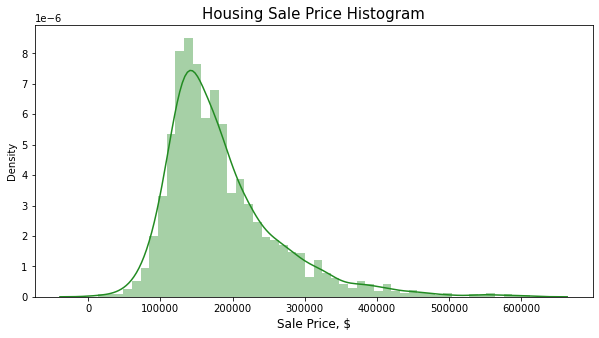

In [46]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(ames_housing.SalePrice, bins=50, kde=True, ax=ax, color="forestgreen")
plt.title("Housing Sale Price Histogram", fontsize=15)
plt.xlabel("Sale Price, $", fontsize=12);

/Users/Saloni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


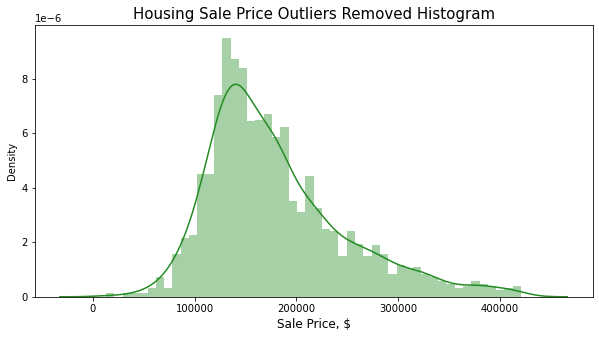

In [47]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(ames_housing_rem.SalePrice, bins=50, kde=True, ax=ax, color="forestgreen")
plt.title("Housing Sale Price Outliers Removed Histogram", fontsize=15)
plt.xlabel("Sale Price, $", fontsize=12);

In [48]:
#Log transform SalePrice to better normalize the curve
ames_housing["LogSalePrice"] = np.log(ames_housing.SalePrice)
ames_housing_rem["LogSalePrice"] = np.log(ames_housing_rem.SalePrice)

<ipython-input-48-4c79ce63d693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_housing_rem["LogSalePrice"] = np.log(ames_housing_rem.SalePrice)


/Users/Saloni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


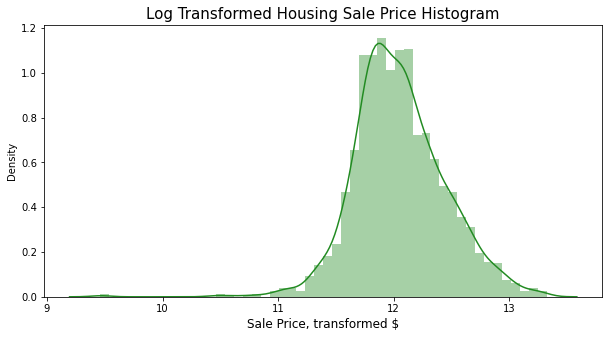

In [49]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(ames_housing.LogSalePrice, bins=50, kde=True, ax=ax, color="forestgreen")
plt.title("Log Transformed Housing Sale Price Histogram", fontsize=15)
plt.xlabel("Sale Price, transformed $", fontsize=12);

/Users/Saloni/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


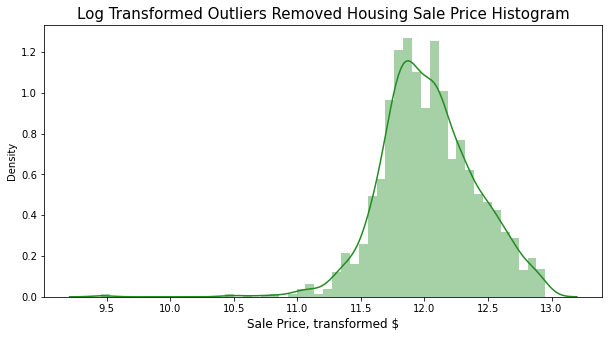

In [50]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(ames_housing_rem.LogSalePrice, bins=50, kde=True, ax=ax, color="forestgreen")
plt.title("Log Transformed Outliers Removed Housing Sale Price Histogram", fontsize=15)
plt.xlabel("Sale Price, transformed $", fontsize=12);

In [51]:
#Check to see which features have a strong correlation with SalePrice
ames_housing.corrwith(ames_housing["SalePrice"]).sort_values(ascending=False).head(10)

SalePrice       1.000000
LogSalePrice    0.949514
OverallQual     0.795408
ExterQual       0.708959
GrLivArea       0.703244
KitchenQual     0.686996
GarageCars      0.646039
GarageArea      0.641373
TotalBsmtSF     0.625666
1stFlrSF        0.617577
dtype: float64

In [52]:
ames_housing_rem.corrwith(ames_housing["SalePrice"]).sort_values(ascending=False).head(10)

SalePrice       1.000000
LogSalePrice    0.958861
OverallQual     0.792245
ExterQual       0.689669
GrLivArea       0.679526
KitchenQual     0.672866
GarageCars      0.640858
GarageArea      0.620155
BsmtQual        0.613282
TotalBsmtSF     0.590970
dtype: float64

In [53]:
ames_housing.corrwith(ames_housing["LogSalePrice"]).sort_values(ascending=False).head(10)

LogSalePrice    1.000000
SalePrice       0.949514
OverallQual     0.817249
GrLivArea       0.696631
ExterQual       0.692049
KitchenQual     0.678292
GarageCars      0.644692
BsmtQual        0.643522
GarageArea      0.619447
TotalBsmtSF     0.617149
dtype: float64

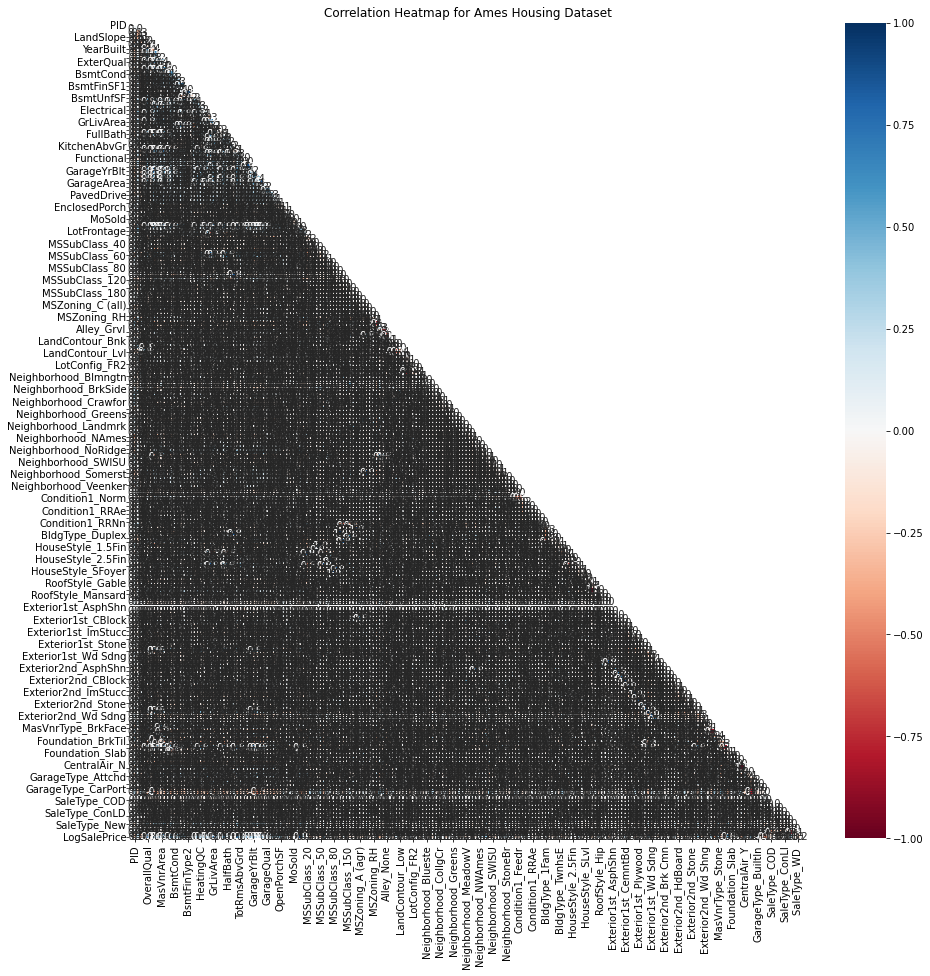

In [54]:
corr = ames_housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
                                  
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(corr,annot=True,mask = mask, cmap="RdBu",fmt=".1f",
                 vmin = -1, vmax = 1,center=0)
ax.set_title("Correlation Heatmap for Ames Housing Dataset");

In [55]:
list(ames_housing)

['PID',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemod/Add',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'Fence',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_15

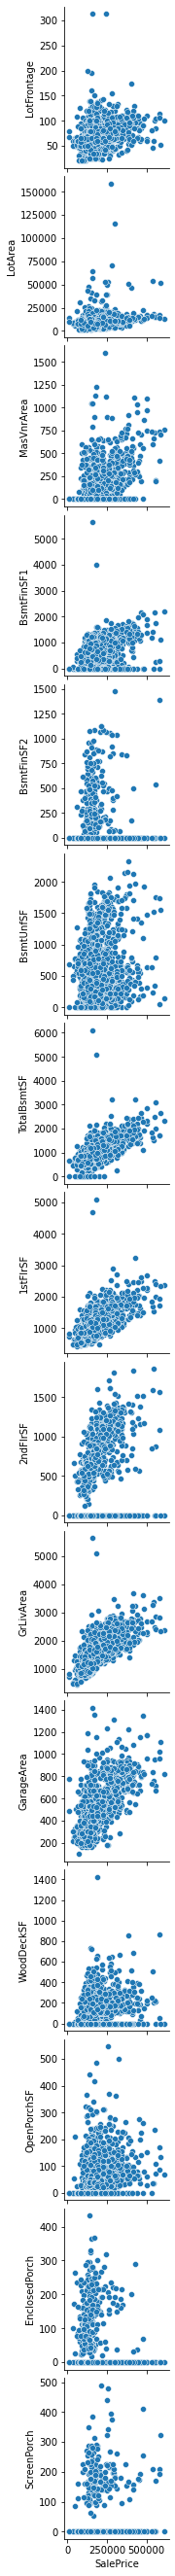

In [56]:
#Check relationship between continuous features and sale price
# LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,
# 1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,
# EnclosedPorch,3-SsnPorch,ScreenPorch,PoolArea,MiscVal
sns.pairplot(ames_housing, y_vars=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2",
                                   "BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
                                   "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
                                   "ScreenPorch"], x_vars="SalePrice")

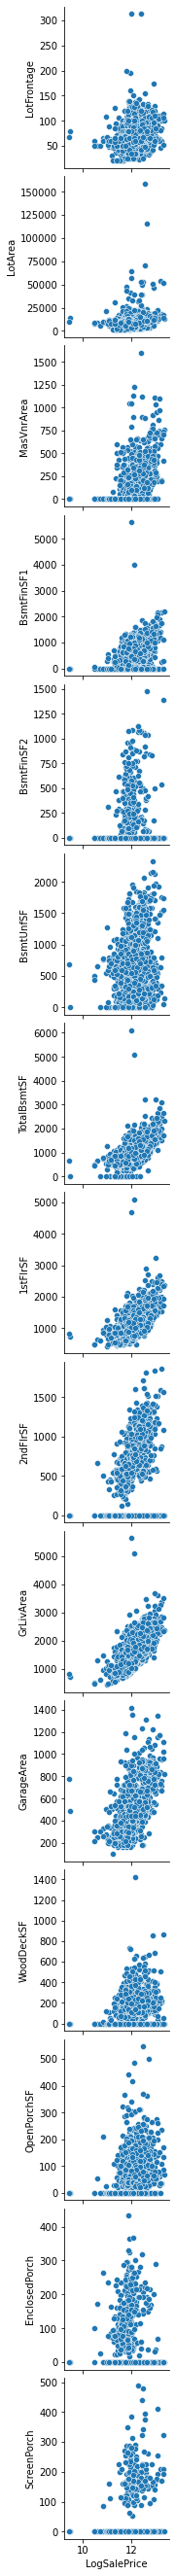

In [57]:
sns.pairplot(ames_housing, y_vars=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2",
                                   "BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
                                   "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch",
                                   "ScreenPorch"], x_vars="LogSalePrice")

In [58]:
#Remove SalePrice from ames_housing
ames_housing_lg = ames_housing.drop("SalePrice",axis=1)

In [74]:
ames_housing_lg.shape

(1914, 201)

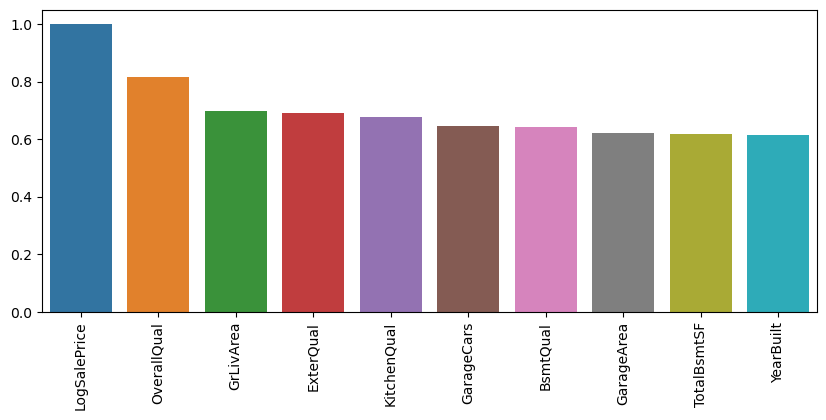

In [77]:
corr = abs(ames_housing_lg.corr()["LogSalePrice"]).sort_values(ascending = False)
large_corr = corr[corr > 0.6]

plt.figure(figsize = (10, 4), dpi = 100)
sns.barplot(x = large_corr.index, y = large_corr.values)
plt.xticks(rotation = 90)
plt.show()

# Model Prep

In [85]:
features = [col for col in ames_housing_lg._get_numeric_data().columns if col != "LogSalePrice"]
X = ames_housing_lg[features]
y = ames_housing_lg["LogSalePrice"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [87]:
lr = LinearRegression()

In [88]:
lasso = LassoCV(n_alphas=200)

In [64]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

# Cross Validation

In [65]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

-3.2544766345959277e+20

In [66]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.870660778916855

In [67]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8568038649137634

# Model fitting and evaluation

In [68]:
lasso.fit(X_train, y_train)

LassoCV(n_alphas=200)

In [69]:
lasso.score(X_train, y_train)

0.9035718877887088

In [70]:
lasso.score(X_test, y_test)

0.8997274959953055

In [71]:
lasso_scores.mean()

0.870660778916855

In [72]:
pred = lasso.predict(X_test)

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)


0.8997274959953055

In [ ]:
# RMSE
np.sqrt(metrics.mean_squared_error(y, predictions))

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [96]:
# Train the model
# Start with the default alpha value of 1 and experiment with different values and its impact on the R-squared values
# we will learn a more efficient technique on how to find the optimal alpha value during our model tuning lesson
lassoRegressor = Lasso()
lassoRegressor.fit(X_train, y_train)
lasso_pred = lassoRegressor.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
R_squared = r2_score(lasso_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.5981403642680374


In [99]:
lassoReg_coef = pd.DataFrame()
lassoReg_coef["Features"] = X_train.columns
lassoReg_coef["Coefficients"] = pd.Series(lassoRe.coef.)
lassoReg_coef.sort_values(by="Coefficients")


SyntaxError: invalid syntax (<ipython-input-99-e0218b664c24>, line 3)

In [ ]:
# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams["figure.figsize"] = (15,6)
plt.bar(coefficient_df["Column_Name"], coefficient_df["Coefficient_Value"])